In [1]:
# imports
import pandas as pd
import numpy as np
import plotnine
from plotnine import *

In [2]:
# generate Shortest Path problem grid
def spp_grid(nx: int, ny: int, p:float = 0.0, seed:int = 1234, min_reward:int=0, max_reward:int=10):
  np.random.seed(seed=seed)
  return pd.DataFrame(
    [
      [
        x+1, 
        y+1, 
        np.random.randint(min_reward, max_reward),
        False
      ]
      for x in range(nx)
      for y in range(ny)
  ], columns = ['x', 'y', 'reward', 'is_stolen'])

In [3]:
# generate line of houses
nx = 10
ny = 1
df = spp_grid(nx=nx, ny=ny, p=0.0, seed=16)

In [4]:
df

,x,y,reward,is_stolen
0,1,1,9,False
1,2,1,9,False
2,3,1,5,False
3,4,1,1,False
4,5,1,4,False
5,6,1,4,False
6,7,1,9,False
7,8,1,0,False
8,9,1,0,False
9,10,1,8,False


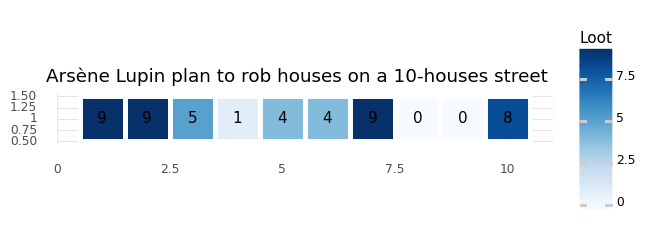

<ggplot: (8769576709898)>

In [5]:
# plot it
(
  ggplot(df) + 
    geom_tile(aes(x='x', y='y', fill='reward'), color='white', size=2) + 
    geom_text(aes(x='x', y='y', label='reward'))+
    scale_fill_cmap(cmap_name="Blues") +
    theme(
      panel_grid = element_blank(),
      axis_text = element_blank(),
      axis_title_x = element_blank(),
      axis_text_x = element_blank(),
      axis_title_y = element_blank(),
      axis_text_y = element_blank(),
      axis_line = element_blank(),
      axis_ticks_major_x=element_blank(),
      axis_ticks_minor_x=element_blank(),
      axis_ticks_major_y=element_blank(),
      axis_ticks_minor_y=element_blank(),
    ) +
    coord_equal() +
    labs(
      title = "Arsène Lupin plan to rob houses on a 10-houses street",
      fill = "Loot",
      x =  "",
      y =  ""
    ) +
    theme_minimal()
)

In [6]:
def robbery(data):
    prev, total = 0, 0
    for house, amount in enumerate(data['reward']):
        if prev + amount > total:
            data.loc[house, 'is_stolen'] = True
        prev, total = total, max(total, prev + amount)
    return total

In [11]:
max_robbery = robbery(data=df)
max_robbery

35

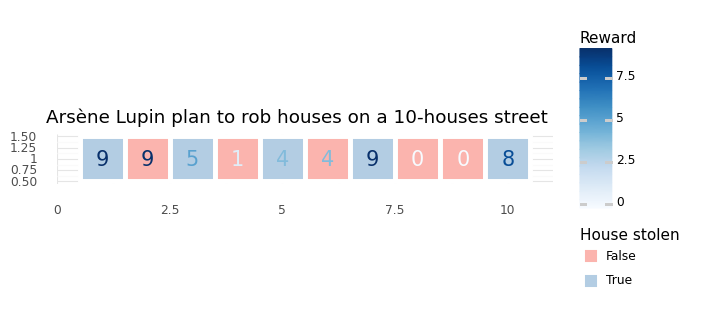

<ggplot: (8769574418784)>

In [14]:
(
  ggplot(df) + 
    geom_tile(aes(x='x', y='y', fill='is_stolen'), color="white", size=2) + 
    geom_text(aes(x='x', y='y', label='reward', color='reward'), size=15)+
    scale_color_cmap(cmap_name="Blues") +
    scale_fill_brewer(type='qual', palette=4) +
    # scale_fill_brewer(type='qual', palette=6) +
    coord_equal() +
    labs(
      title = "Arsène Lupin plan to rob houses on a 10-houses street",
      color = "Reward",
      fill = "House stolen",
      x =  "",
      y =  ""
    ) +
    theme_minimal()
)